In [1]:
import os

In [2]:
os.chdir('../catalogues')

In [3]:
import split_halo_catalogue as shc

In [4]:
fIn = 'COMAP_z2.39-3.44_1140Mpc_seed_13579.npz'

In [5]:
halos, cosmo = shc.load_peakpatch_catalogue(fIn)


	halo catalogue contains:
		 ['cosmo_header', 'M', 'zform', 'vx', 'zhalo', 'vy', 'y', 'x', 'vz', 'z']

	51306419 halos loaded


In [8]:
min(halos.ra)

-5.7341356

In [9]:
max(halos.ra)

5.7902255

In [13]:
max(halos.ra) - min(halos.ra)

11.524361

In [10]:
min(halos.dec)

-5.7696514

In [11]:
max(halos.dec)

5.791305

In [25]:
# fov_x  = max(halos.ra) - min(halos.ra)
# fov_y  = max(halos.dec) - min(halos.dec)
fov_x  = 9.52
fov_y  = 9.52

In [26]:
fov_x_subfield = 1.4
fov_y_subfield = 1.4

n_subfield   = int((fov_x//fov_x_subfield) * (fov_y//fov_y_subfield))
n_y_subfield = int(fov_x//fov_x_subfield)
n_x_subfield = int(fov_y//fov_y_subfield)

fov_x_new  = n_x_subfield*fov_x_subfield
fov_y_new  = n_y_subfield*fov_y_subfield

bar = 90*'-'
print('\n'+bar+'\n',n_subfield,' subfields of',fov_x_subfield,'deg x',fov_y_subfield,'deg can fit into the full',fov_x,'deg x',fov_y,'deg fov','\n'+bar+'\n',)


------------------------------------------------------------------------------------------
 36  subfields of 1.4 deg x 1.4 deg can fit into the full 9.52 deg x 9.52 deg fov 
------------------------------------------------------------------------------------------



In [ ]:
# loop over each subfield and save halos as seperate files
for i in range(n_y_subfield):
    for j in range(n_x_subfield):

        fov_x_l  = -fov_x_new/2 + fov_x_subfield * (j  )
        fov_x_r  = -fov_x_new/2 + fov_x_subfield * (j+1)

        fov_y_l  = -fov_y_new/2 + fov_y_subfield * (i  )
        fov_y_r  = -fov_y_new/2 + fov_y_subfield * (i+1)

        cen_fov_x = -fov_x_new/2 + fov_x_subfield * (j+1./2)
        cen_fov_y = -fov_y_new/2 + fov_y_subfield * (i+1./2)

        # cut halos outside sub-field of view
        halosi = shc.cull_peakpatch_catalogue(halos, fov_x_l, fov_x_r, fov_y_l, fov_y_r)

        ifileout = i*n_x_subfield+j
        print("writing subfield: ", ifileout)
        fileout = filein[:-4]+'_subfield_'+str(ifileout)

        # save to file, with cen_x_fov, cen_y_fov denoting the center of the field of view kept
        cosmo_header   = {'Omega_M': cosmo.Omega_M, 'Omega_B': cosmo.Omega_B, 'Omega_L': cosmo.Omega_L,
                          'h':cosmo.h, 'ns':cosmo.ns, 'sigma8':cosmo.sigma8,
                          'cen_x_fov':cen_fov_x, 'cen_y_fov':cen_fov_y}
        np.savez(fileout, cosmo_header=cosmo_header,
                 x=halosi.x_pos, y=halosi.y_pos, z=halosi.z_pos,
                 vx=halosi.vx, vy=halosi.vy, vz=halosi.vz,
                 M=halosi.M, zhalo=halosi.redshift,zform=halosi.zformation)

In [14]:
fov_x_new

9.0

In [5]:
import matplotlib.pyplot as plt
import numpy as np

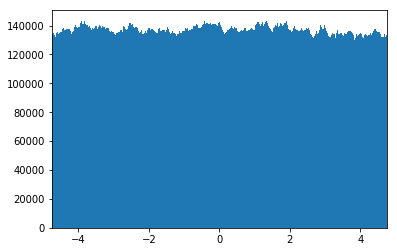

In [24]:
t1, t2 = np.histogram(halos.ra, bins='auto')
plt.hist(halos.ra, bins='auto')
plt.xlim([-4.751,4.751])
plt.show()

In [18]:
t1

array([   172,   1565,   3975,   7416,  10993,  15516,  19237,  23194,
        28714,  32908,  35937,  38574,  42354,  45319,  48240,  53013,
        58557,  62767,  67451,  71728,  74545,  78317,  82021,  87798,
        94061,  98384, 103080, 106937, 111758, 113749, 117184, 120031,
       124081, 128103, 131623, 132576, 134529, 133611, 132017, 134994,
       135862, 133871, 134756, 135752, 135609, 137360, 138027, 137246,
       135819, 136798, 137704, 137723, 137866, 137341, 136139, 134450,
       135668, 136132, 138695, 140146, 139164, 138296, 139215, 139304,
       141468, 143020, 140783, 140844, 142867, 141051, 140559, 140266,
       139045, 139383, 138498, 136930, 138335, 137968, 138564, 139916,
       139949, 137300, 138905, 140430, 139971, 138556, 139380, 139161,
       138809, 137807, 137977, 138570, 138000, 136012, 135846, 136281,
       135897, 135632, 134050, 133524, 134599, 134655, 135812, 135461,
       137265, 136662, 135695, 136461, 139750, 139336, 137761, 137110,
      

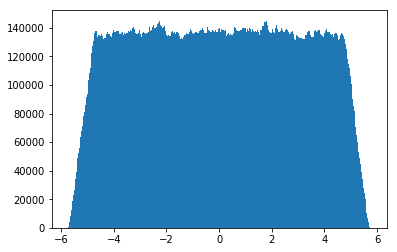

In [11]:
plt.hist(halos.dec, bins='auto')
plt.show()

In [5]:
shc.split_catalogue(fIn, True)


------------------------------------------------------------------------------------------
 4  subfields of 1.4 deg x 1.4 deg can fit into the full 3.0 deg x 3.0 deg fov 
------------------------------------------------------------------------------------------


	halo catalogue contains:
		 ['cosmo_header', 'M', 'zform', 'vx', 'zhalo', 'vy', 'y', 'x', 'vz', 'z']

	51306419 halos loaded

	991739 halos remain after map cut
writing subfield:  0

	896656 halos remain after map cut
writing subfield:  1

	960273 halos remain after map cut
writing subfield:  2

	908539 halos remain after map cut
writing subfield:  3


# Rotate positions

In [5]:
import matplotlib.pyplot as plt
import numpy as np

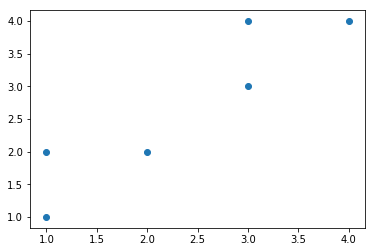

In [9]:
x = [1, 1, 2, 3, 3, 4]
y = [1, 2, 2, 4, 3, 4]
plt.scatter(x, y)
plt.show()

In [11]:
m = [[np.cos(ang), -np.sin(ang)], [np.sin(ang), np.cos(ang)]]

In [12]:
m

[[-1.0, -1.2246467991473532e-16], [1.2246467991473532e-16, -1.0]]

In [13]:
x2, y2 = np.matmul(m, [x, y])

In [10]:
ang = np.pi

In [15]:
x2 = []
y2 = []
for x,y in zip(x,y):
    x2.append(np.cos(ang)*x - np.sin(ang)*y)
    y2.append(np.sin(ang)*x + np.cos(ang)*y)

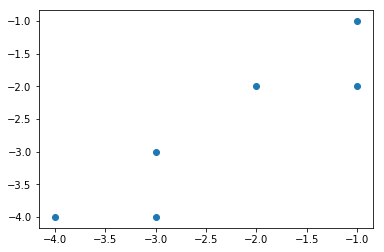

In [14]:
plt.scatter(x2, y2)
plt.show()

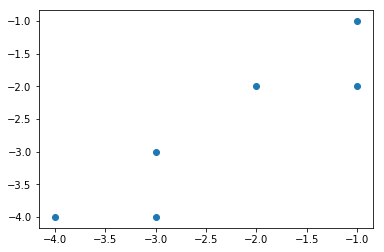

In [17]:
x = x2
y = y2
plt.scatter(x, y)
plt.show()

In [18]:
np.array([1,2,34])

array([ 1,  2, 34])

In [29]:
'{0:d}'.format(int(180.5))

'180'

In [5]:
shc.split_catalogue(fIn, 180, True)


------------------------------------------------------------------------------------------
 4  subfields of 1.4 deg x 1.4 deg can fit into the full 3.0 deg x 3.0 deg fov 
------------------------------------------------------------------------------------------


	halo catalogue contains:
		 ['cosmo_header', 'M', 'zform', 'vx', 'zhalo', 'vy', 'y', 'x', 'vz', 'z']

	rotate catalogs by 180 degrees

	51306419 halos loaded

	908539 halos remain after map cut
writing subfield:  0

	960273 halos remain after map cut
writing subfield:  1

	896656 halos remain after map cut
writing subfield:  2

	991739 halos remain after map cut
writing subfield:  3


In [7]:
shc.split_catalogue(fIn, 0, True)


------------------------------------------------------------------------------------------
 4  subfields of 1.4 deg x 1.4 deg can fit into the full 3.0 deg x 3.0 deg fov 
------------------------------------------------------------------------------------------


	halo catalogue contains:
		 ['cosmo_header', 'M', 'zform', 'vx', 'zhalo', 'vy', 'y', 'x', 'vz', 'z']
[-244.34204 -236.45581 -225.84695 -281.2183  -209.22865 -227.40985
 -244.3466  -194.96432 -209.85834 -269.94022]
[-100.42944  -101.372505 -132.22028  -136.22385  -117.77108  -142.22499
 -106.08487  -171.4949   -129.62122  -171.08308 ]
[2.132791  2.0684428 1.9914612 2.4533706 1.8476788 2.0065684 2.136873
 1.7156451 1.848221  2.3608103]
[-0.87634873 -0.8865122  -1.1654893  -1.1878942  -1.0397313  -1.2544763
 -0.92744297 -1.5085452  -1.1412243  -1.4954746 ]

	51306419 halos loaded

	991739 halos remain after map cut
writing subfield:  0

	896656 halos remain after map cut
writing subfield:  1

	960273 halos remain after map cut


# Loop Through All Normal Catalogs

In [8]:
from os import listdir

In [14]:
from os.path import isfile, join
onlyfiles = [f for f in listdir('./') if (isfile(join('./', f)) and f[0] != '.' and '.py' not in f and 'subfield' not in f)]

In [15]:
onlyfiles

['COMAP_z2.39-3.44_1140Mpc_seed_13579.npz']